In [1]:
import pandas as pd

In [7]:
A = pd.read_csv(r"C:\Users\hp\Downloads\Cars93.csv")
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Profile

In [8]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

# Missing Data Treatment

In [9]:
A.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [10]:
def replacer(df):
    for i in df.columns:
        if(df[i].dtypes == 'object'):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [11]:
replacer(A)

# Prepare X and Y

In [27]:
Y = A[['Type']]
X = A.drop(labels=['Type','id','Make','Manufacturer'],axis=1)

cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)
X[con]
X1 = pd.get_dummies(X[cat])
Xnew =  X[con].join(X1)

# train test split

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Model creation

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=10,criterion='entropy')
model = dtc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_err = round(accuracy_score(ytrain,tr_pred),2)
ts_err = round(accuracy_score(ytest,ts_pred),2)
tr_err,ts_err

(1.0, 0.68)

# pruning (max_depth)

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=10,criterion='gini')

def tree(mo):
    model = mo.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_err = round(accuracy_score(ytrain,tr_pred),2)
    ts_err = round(accuracy_score(ytest,ts_pred),2)
    return tr_err,ts_err

    



In [40]:
tr = []
ts = []
for i in range(2,20,1):
    
    dtc = DecisionTreeClassifier(random_state=25,max_depth=i)
    tra,tsa = tree(dtc)
    tr.append(tra)
    ts.append(tsa)

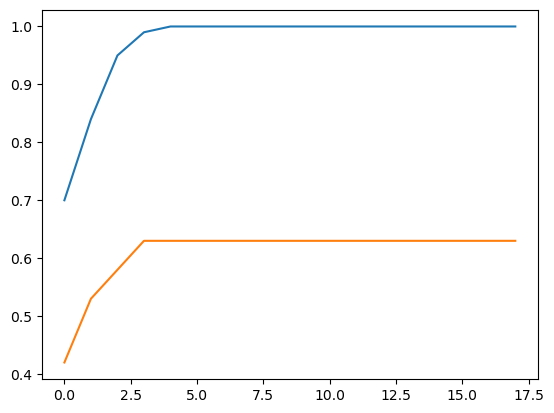

In [43]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

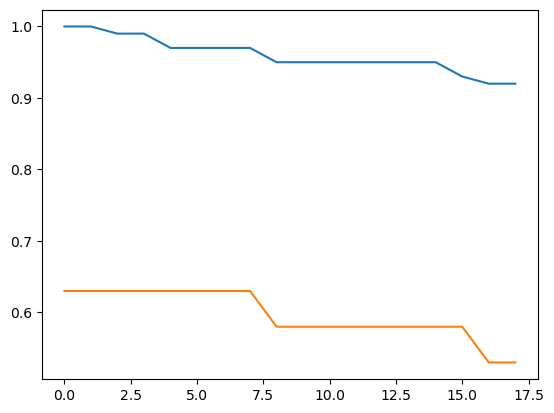

In [45]:
tr = []
ts = []
for i in range(2,20,1):
    
    dtc = DecisionTreeClassifier(random_state=25,min_samples_split=i)
    tra,tsa = tree(dtc)
    tr.append(tra)
    ts.append(tsa)
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

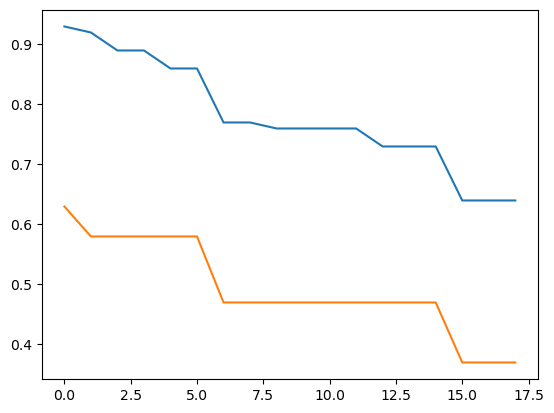

In [46]:
tr = []
ts = []
for i in range(2,20,1):
    
    dtc = DecisionTreeClassifier(random_state=25,min_samples_leaf=i)
    tra,tsa = tree(dtc)
    tr.append(tra)
    ts.append(tsa)
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)